In [1]:
from time import time   

import json
import os
import numpy as np      
import torch            
import torch.nn as nn

import torchvision      
import torchvision.transforms as transforms
import torchsummary     

from model import CNN
from utils import visualizer

In [2]:
with open("./config.json","r") as f:
    cfg = json.load(f)

gpu_id = cfg["gpu_id"]
epoch_num = cfg["epoch_num"]
batch_size = cfg["batch_size"]
save_every_epoch_num = cfg["save_every_epoch_num"]    


In [3]:
if gpu_id >= 0:
    if not torch.cuda.is_available():
       raise RuntimeError(f"GPU is not available.")
    else:
                torch.cuda.init()
    print(f"Running with GPU {gpu_id}.")
else:
    print(f"Running with CPU.")
device = torch.device(gpu_id if gpu_id >= 0 else "cpu")

Running with GPU 0.


In [4]:
model = CNN().to(device).cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

### 定義したモデルの情報を表示
if gpu_id >= 0:  
    torchsummary.summary(model, (1, 28, 28), device='cuda') 
else:         
    torchsummary.summary(model, (1, 28, 28), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           4,640
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6             [-1, 32, 7, 7]               0
            Linear-7                 [-1, 1024]       1,606,656
              ReLU-8                 [-1, 1024]               0
            Linear-9                 [-1, 1024]       1,049,600
             ReLU-10                 [-1, 1024]               0
           Linear-11                   [-1, 10]          10,250
Total params: 2,671,306
Trainable params: 2,671,306
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forw

In [5]:
train_data = torchvision.datasets.MNIST(root="./", train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root="./", train=False, transform=transforms.ToTensor(), download=True)

print(type(train_data.data), type(train_data.targets))
print(type(test_data.data), type(test_data.targets))

print(train_data.data.size(), train_data.targets.size())
print(test_data.data.size(), test_data.targets.size())

<class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])


epoch: 1
  mean loss: 0.04761500404914841
  mean accuracy: 0.9849833333333333
  elapsed time: (0.9849833333333333, 11.679168939590454)
epoch: 2
  mean loss: 0.038319719595213735
  mean accuracy: 0.9878166666666667
  elapsed time: (0.9878166666666667, 23.013488292694092)
epoch: 3
  mean loss: 0.030082341001640697
  mean accuracy: 0.9905166666666667
  elapsed time: (0.9905166666666667, 33.74819326400757)
epoch: 4
  mean loss: 0.02577880614999837
  mean accuracy: 0.9915666666666667
  elapsed time: (0.9915666666666667, 44.21223735809326)
epoch: 5
  mean loss: 0.020973398828743182
  mean accuracy: 0.9932
  elapsed time: (0.9932, 55.079773902893066)
epoch: 6
  mean loss: 0.017496737777837553
  mean accuracy: 0.9941333333333333
  elapsed time: (0.9941333333333333, 66.1231279373169)
epoch: 7
  mean loss: 0.014242868753062793
  mean accuracy: 0.9955333333333334
  elapsed time: (0.9955333333333334, 76.8293993473053)
epoch: 8
  mean loss: 0.01192459046105796
  mean accuracy: 0.9960833333333333
  

y:\kameda\mnist_classification\utils\visualizer.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


epoch: 21
  mean loss: 0.00047520020602860314
  mean accuracy: 0.9998666666666667
  elapsed time: (0.9998666666666667, 232.6691029071808)
epoch: 22
  mean loss: 0.00041795680737569303
  mean accuracy: 0.99995
  elapsed time: (0.99995, 243.8449273109436)
epoch: 23
  mean loss: 0.00037363062936852503
  mean accuracy: 0.99995
  elapsed time: (0.99995, 255.32911014556885)
epoch: 24
  mean loss: 0.00040064462285234486
  mean accuracy: 0.9999333333333333
  elapsed time: (0.9999333333333333, 266.57832860946655)
epoch: 25
  mean loss: 0.00027533090382803494
  mean accuracy: 0.99995
  elapsed time: (0.99995, 278.1565353870392)
epoch: 26
  mean loss: 0.0003375898846248523
  mean accuracy: 0.9999
  elapsed time: (0.9999, 289.02965807914734)
epoch: 27
  mean loss: 0.00019574488012930638
  mean accuracy: 0.9999833333333333
  elapsed time: (0.9999833333333333, 299.87697196006775)
epoch: 28
  mean loss: 0.0002380620358378375
  mean accuracy: 0.9999666666666667
  elapsed time: (0.9999666666666667, 310

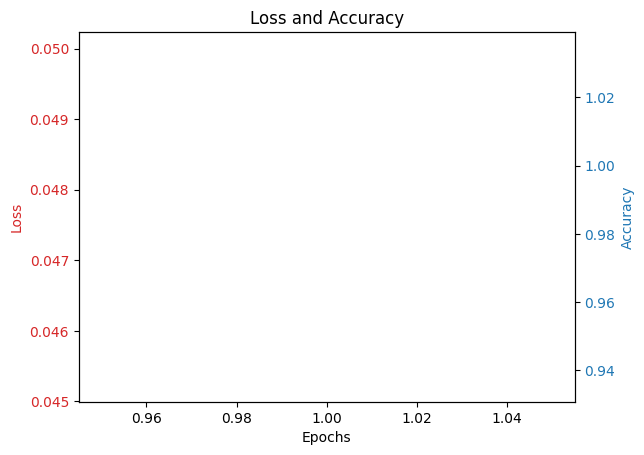

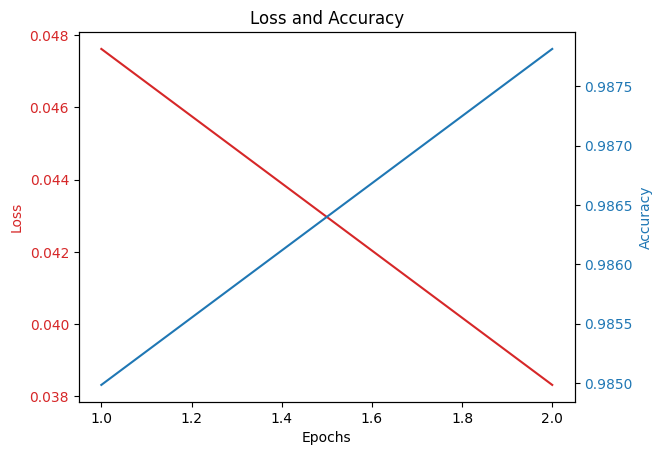

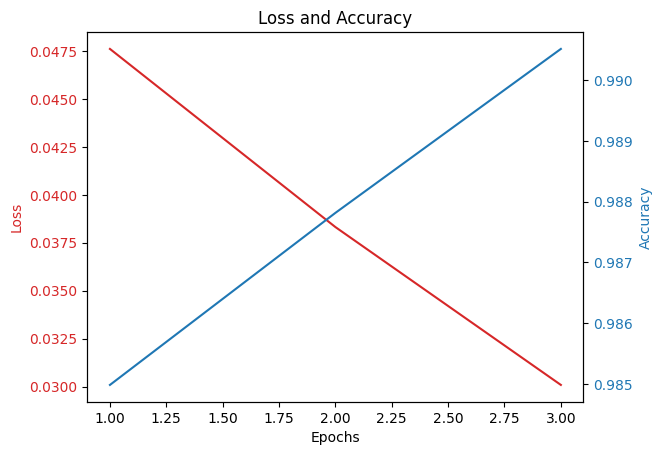

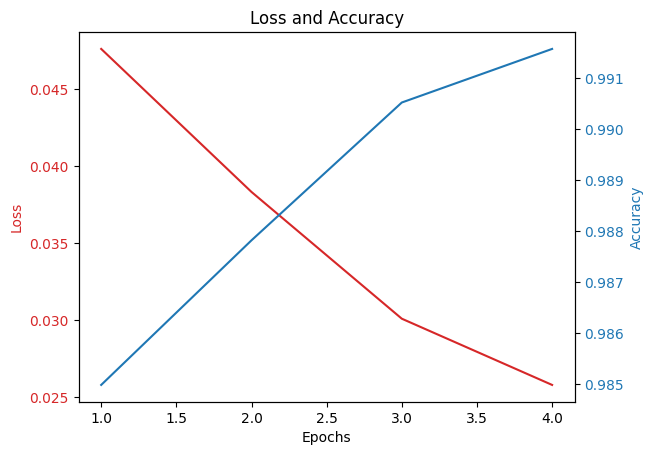

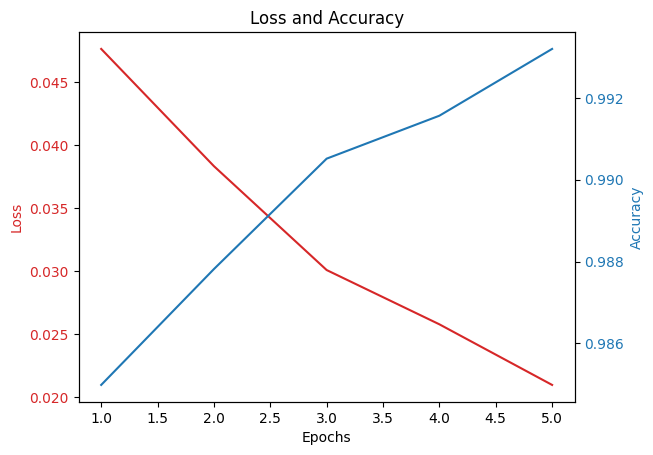

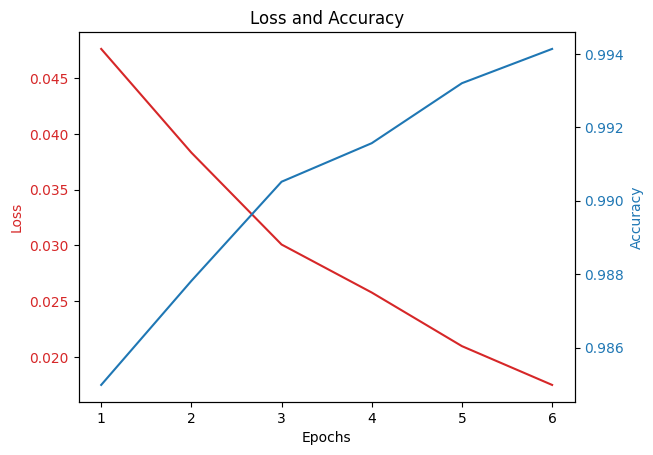

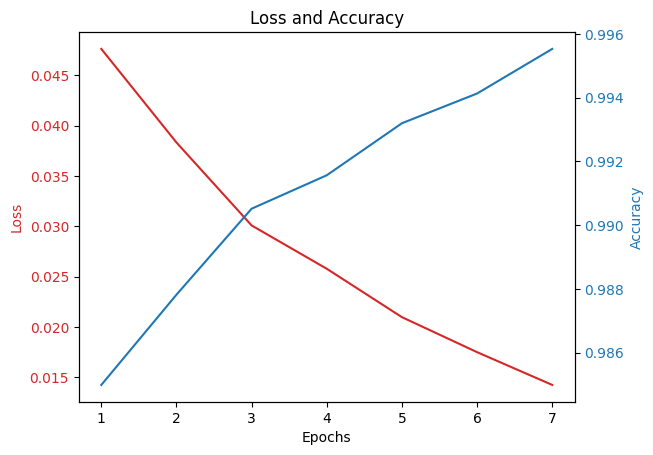

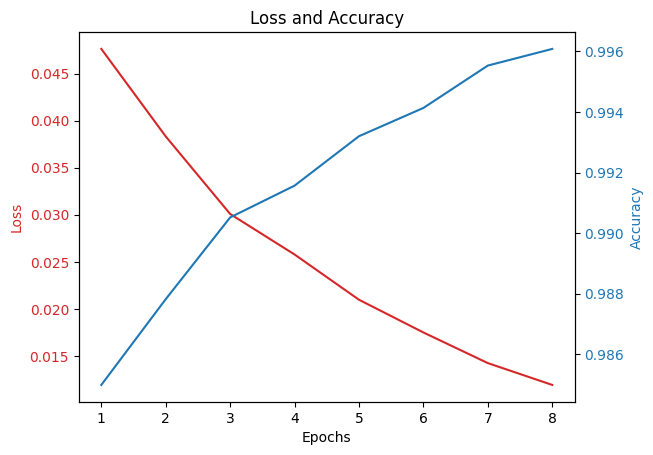

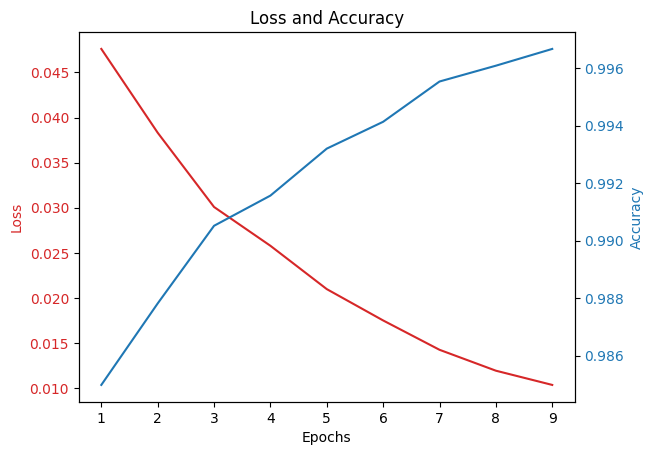

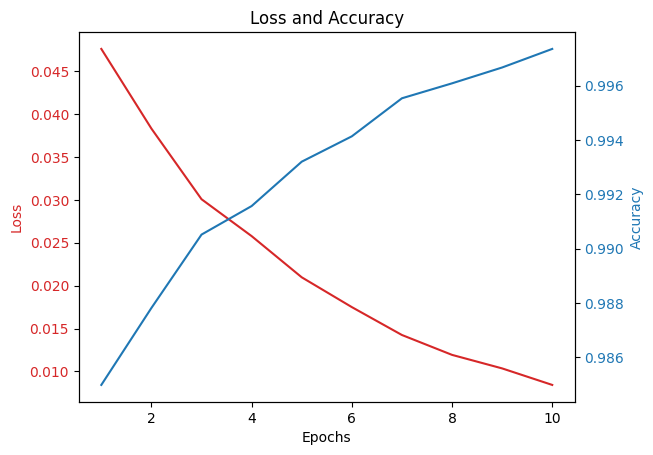

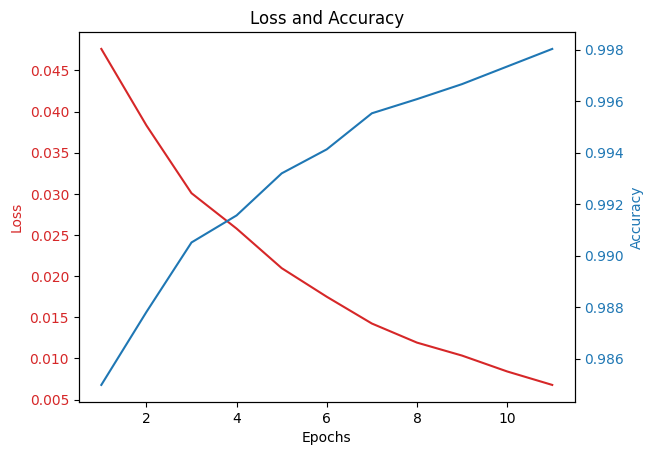

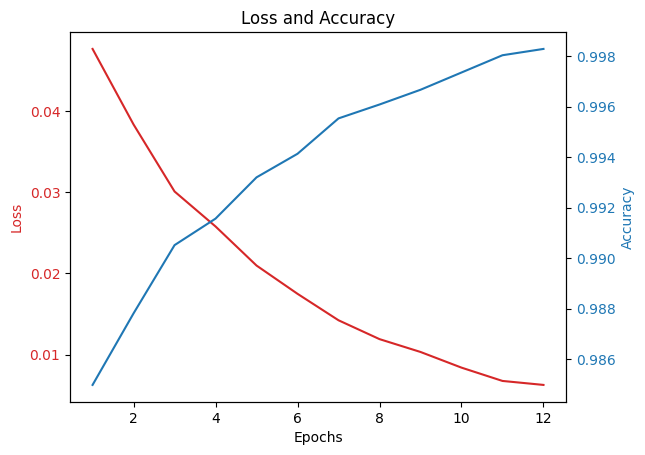

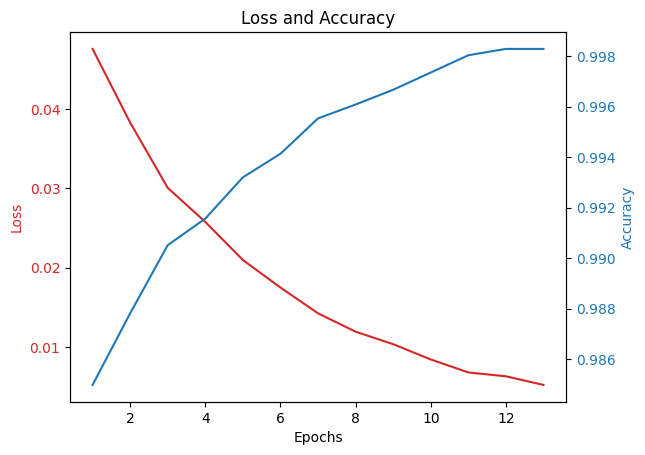

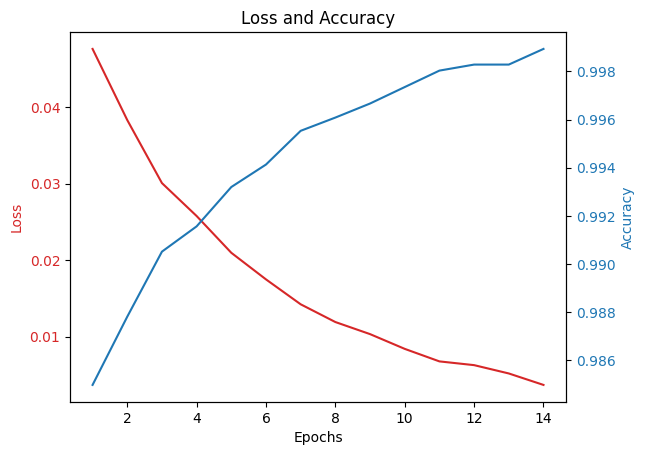

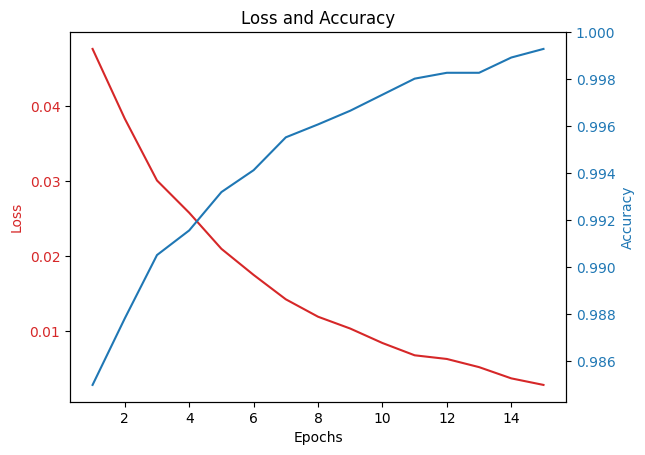

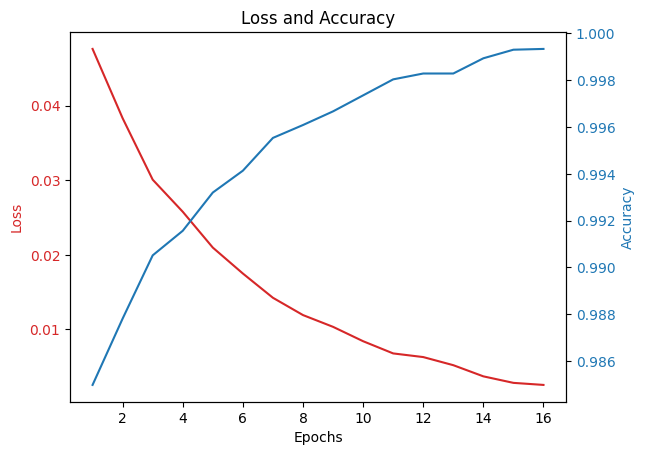

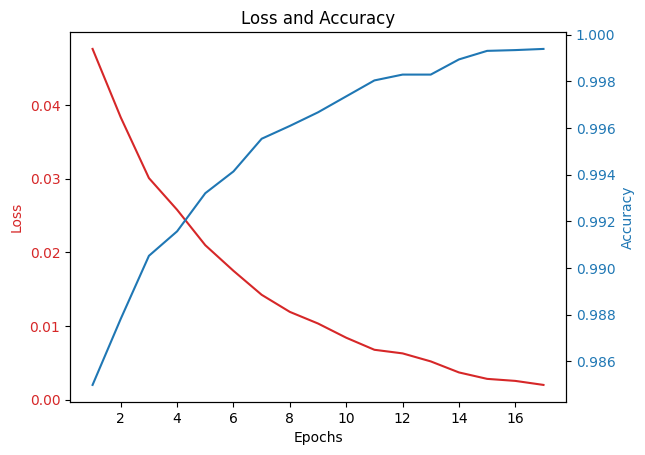

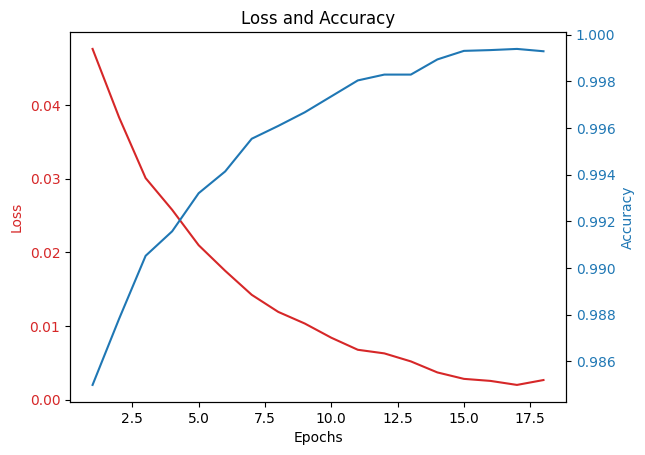

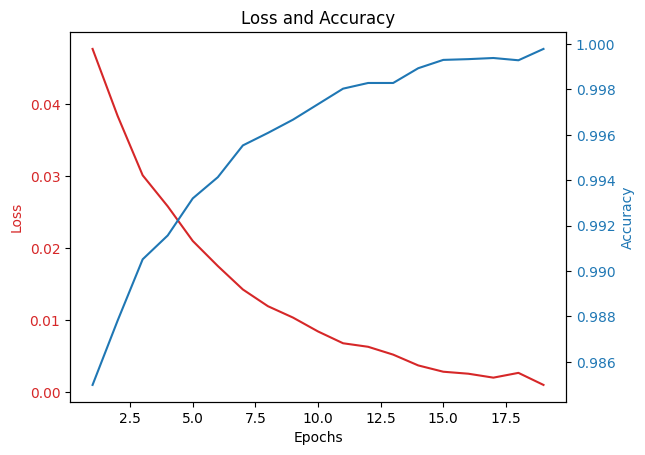

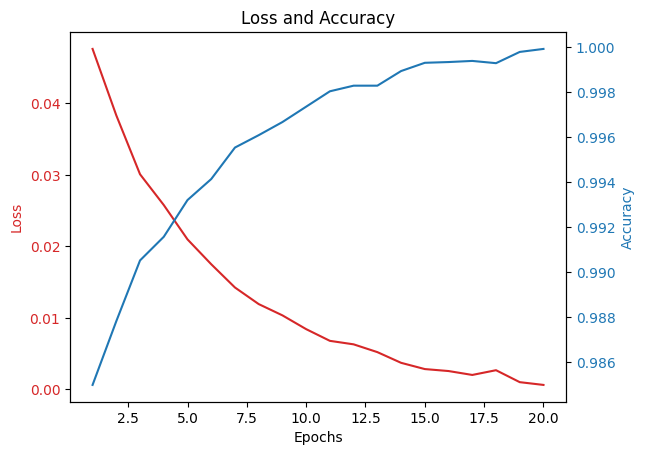

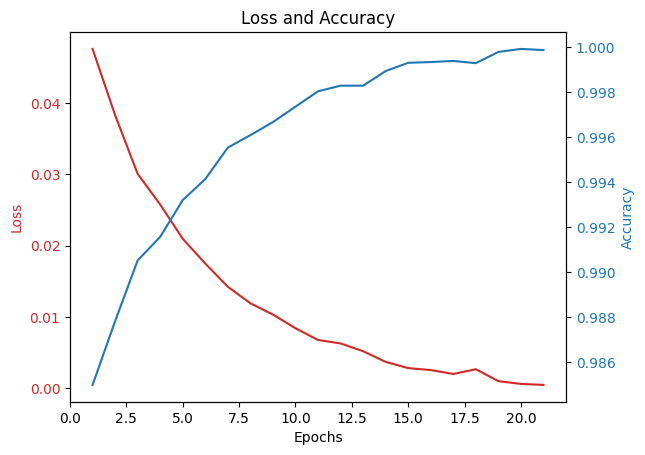

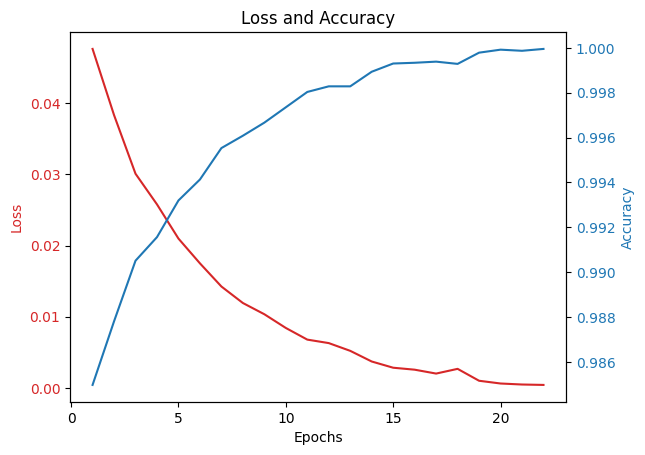

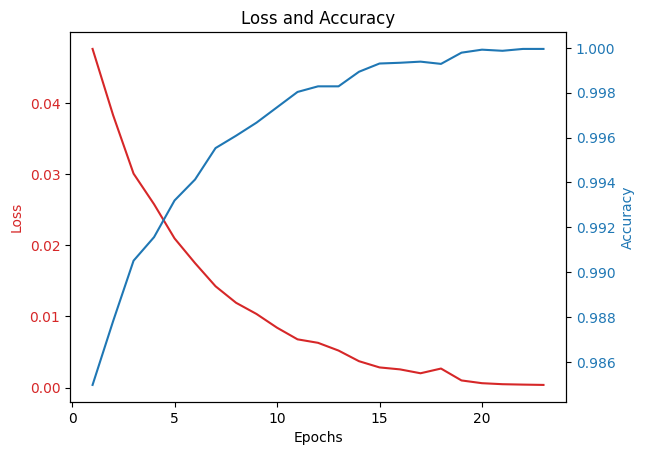

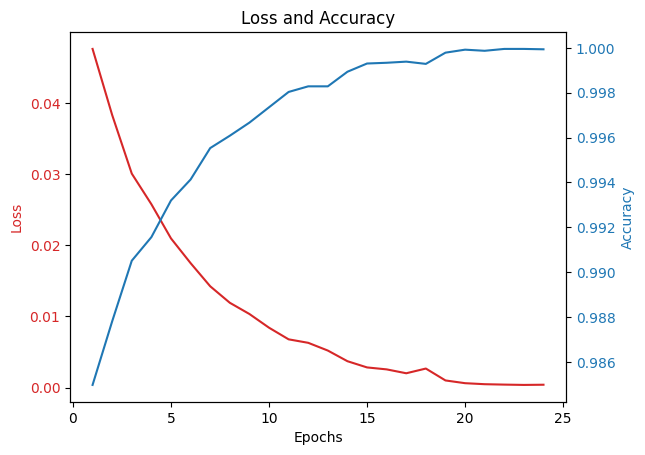

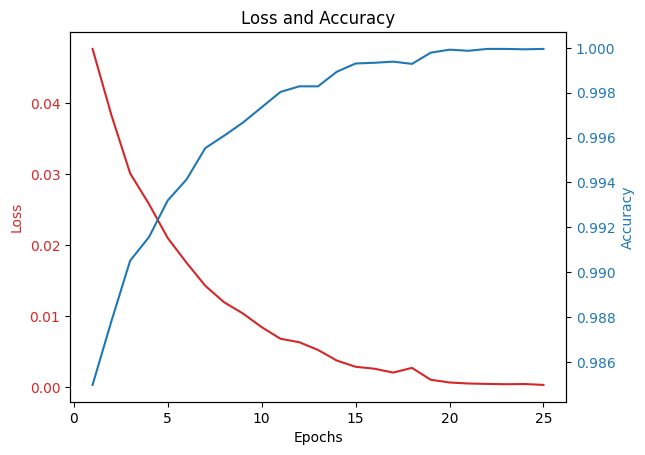

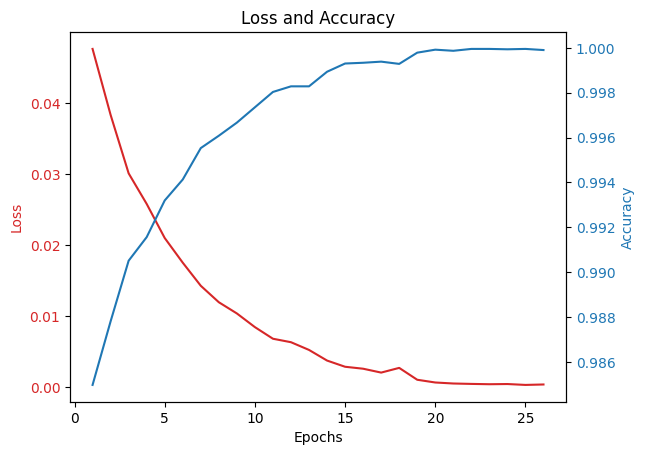

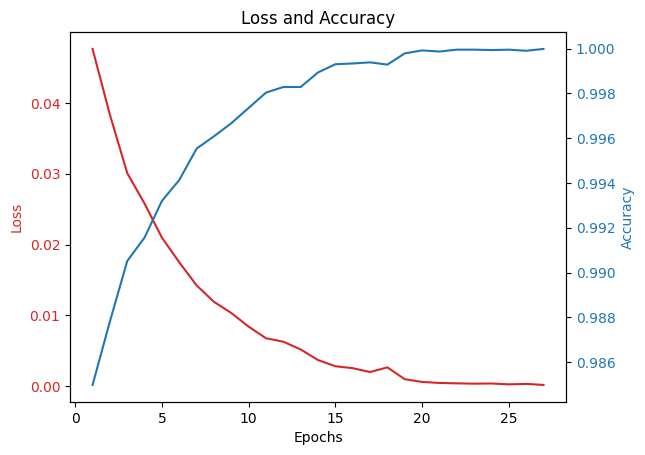

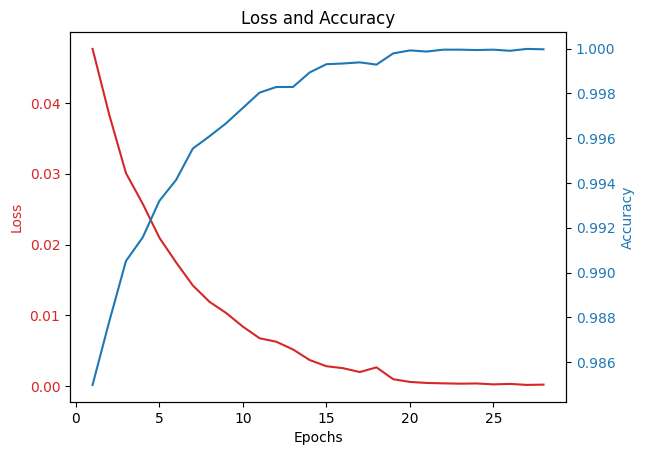

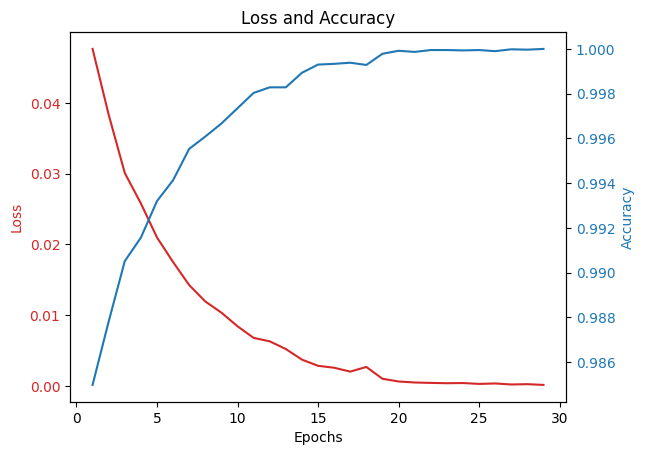

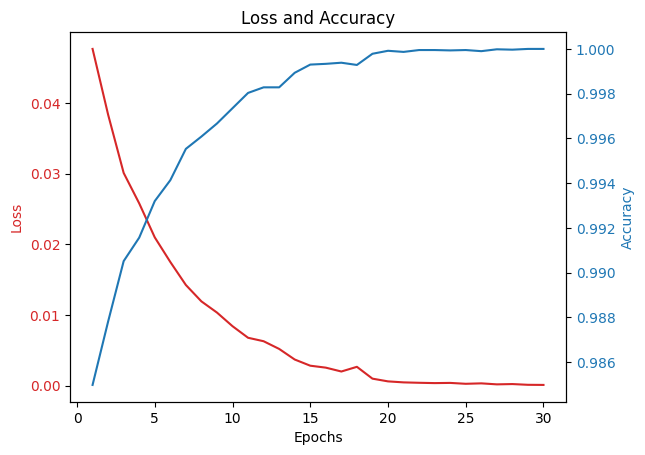

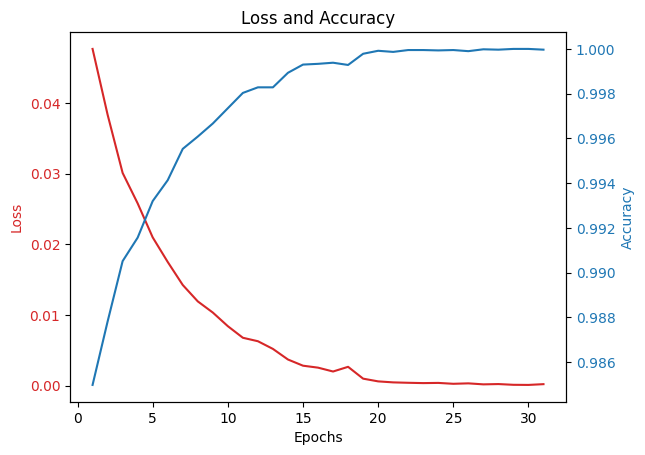

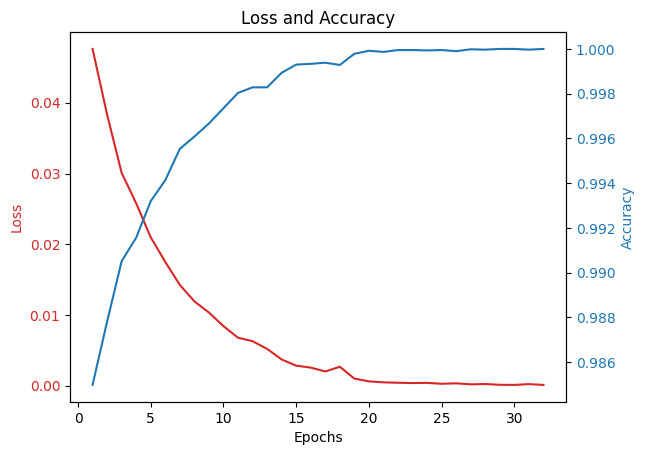

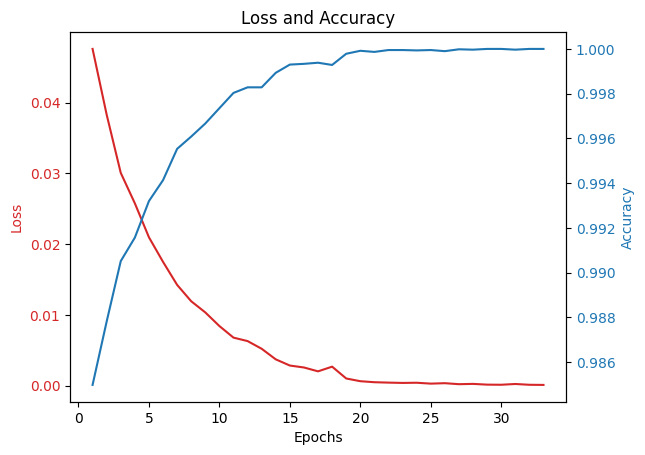

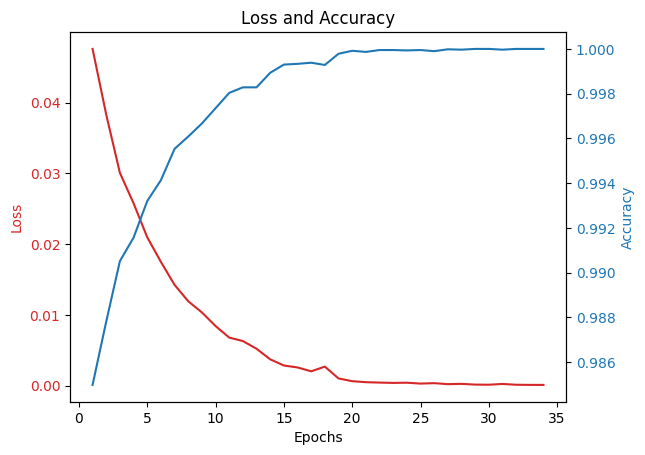

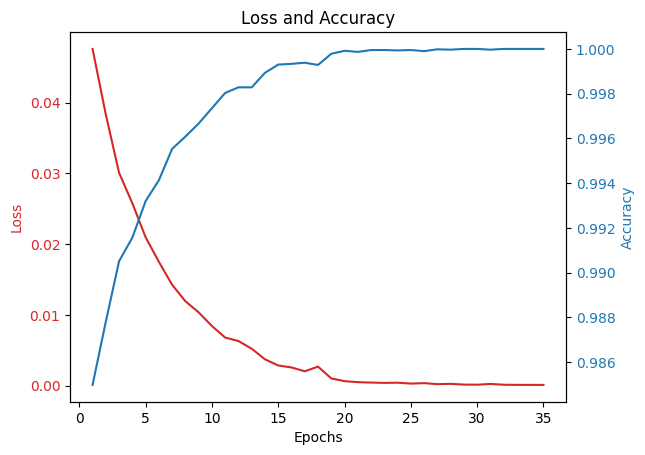

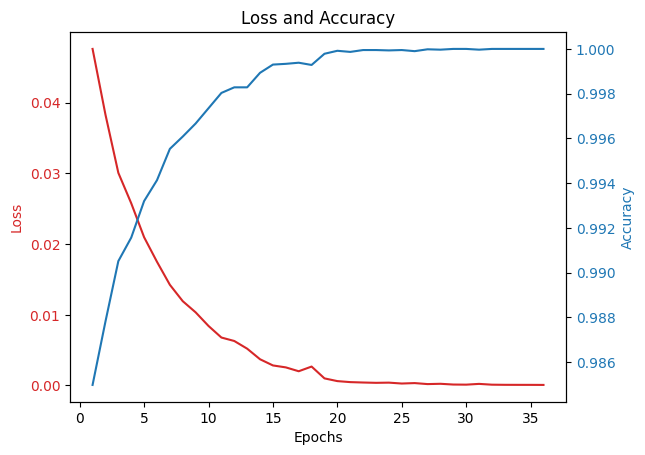

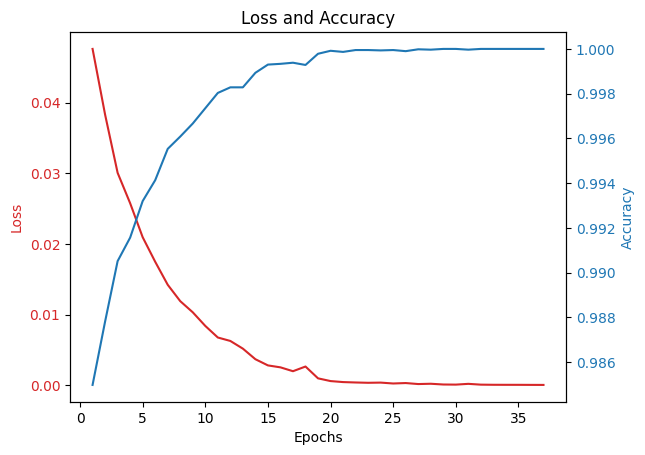

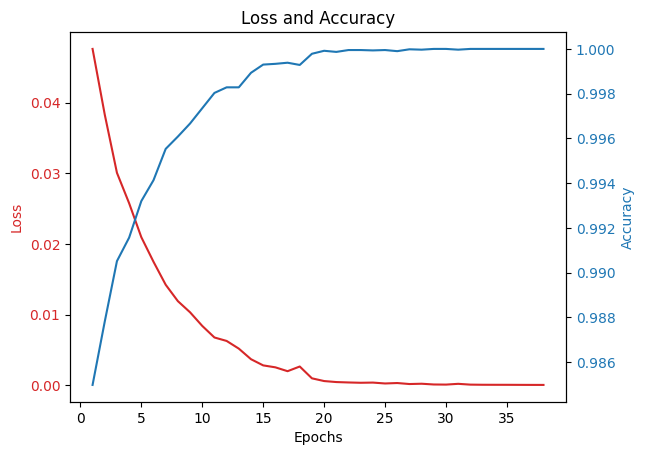

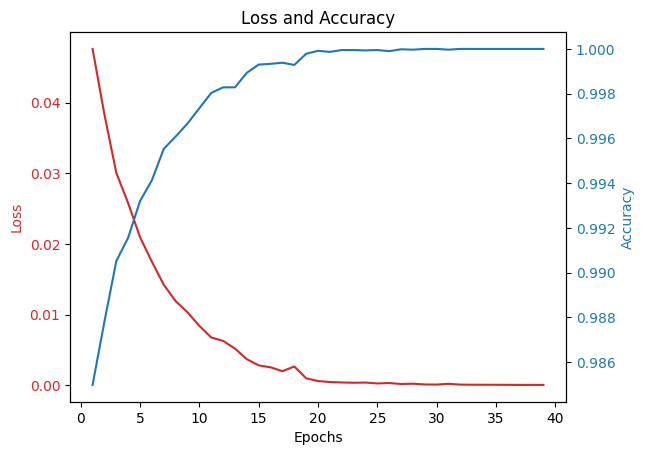

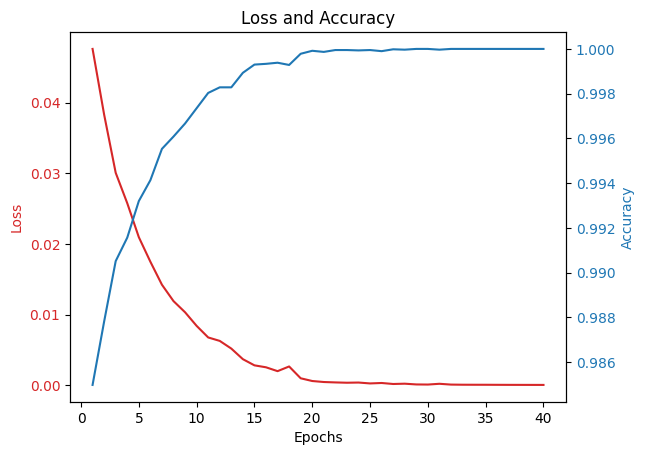

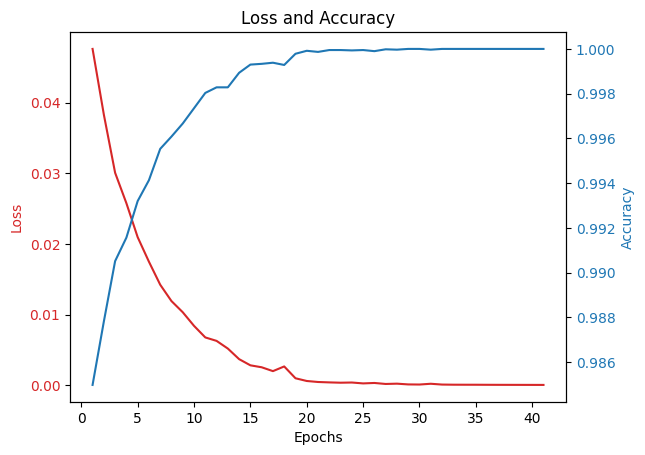

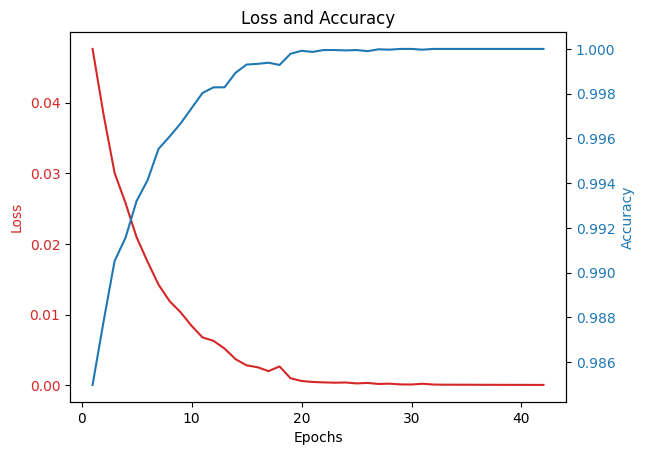

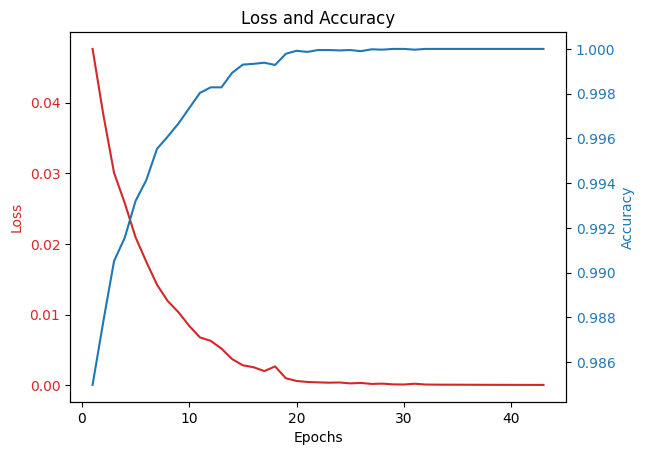

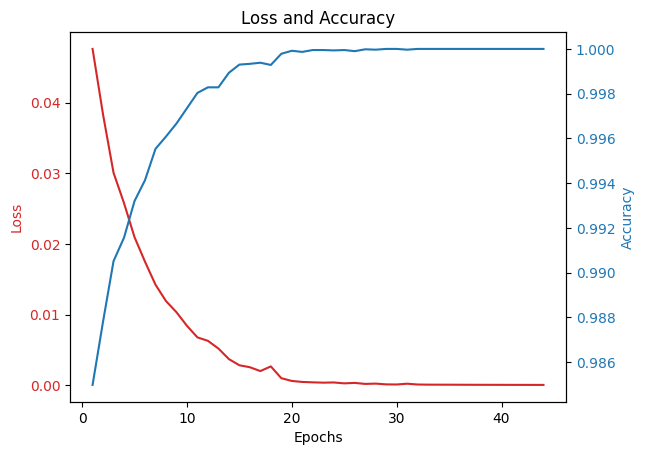

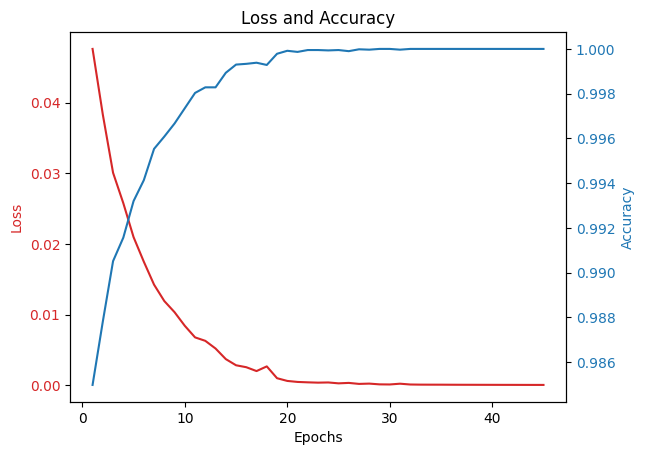

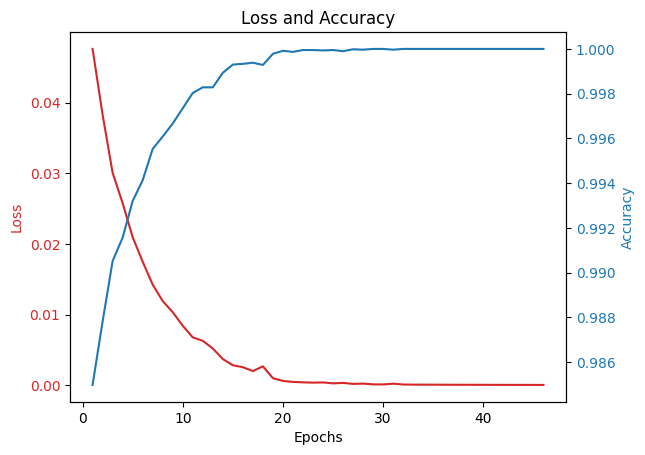

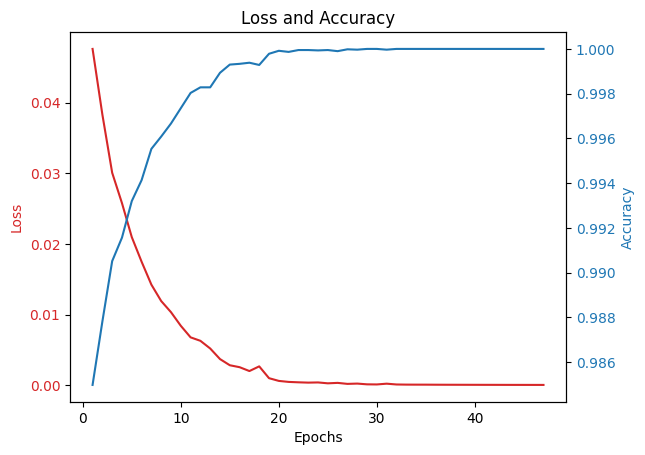

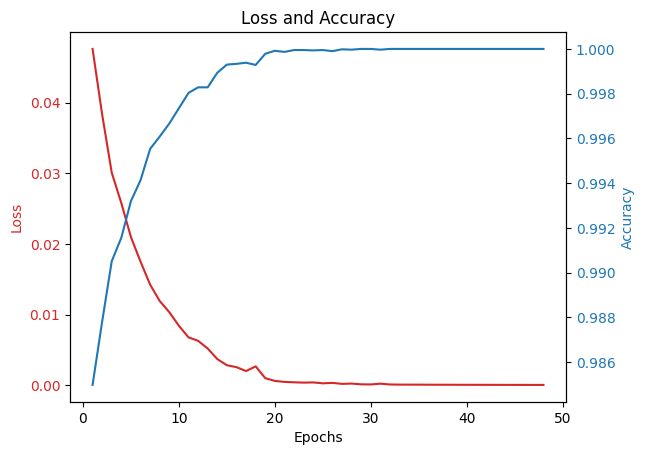

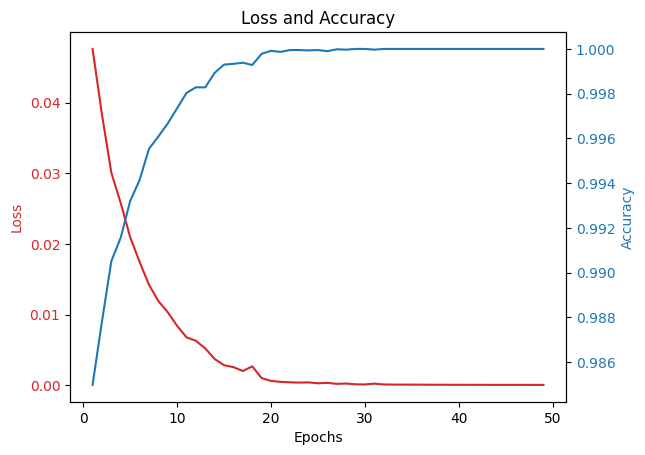

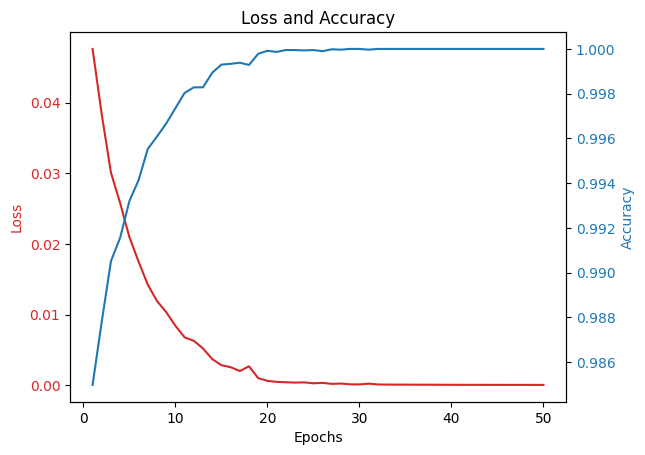

In [8]:
# データローダーの設定
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
criterion = nn.CrossEntropyLoss()
if gpu_id >= 0:
    criterion.cuda()

model.train()
train_losses = []  
train_accuracies = []

# 学習の実行
train_start = time()
for epoch in range(1, epoch_num+1):   # epoch
    sum_loss = 0.0
    correct_count = 0

    for image, label in train_loader: # iteration

        if gpu_id >= 0:
            image = image.cuda()
            label = label.cuda()

        y = model(image)  # データの入力と結果の出力

        # 誤差計算とbackpropagation, パラメータの更新
        loss = criterion(y, label)
        model.zero_grad()
        loss.backward()
        optimizer.step()

        # 学習経過を確認
        sum_loss += loss.item()
        pred = torch.argmax(y, dim=1)
        correct_count += torch.sum(pred == label)

    train_losses.append(sum_loss/len(train_loader))
    train_accuracies.append(correct_count.item()/len(train_data))

    visualizer.logger(range(1,epoch+1), train_losses, train_accuracies)

    # epoch, 誤差平均, 精度平均, ラップタイム
    print(f"epoch: {epoch}\n  mean loss: {sum_loss/len(train_loader)}\n  mean accuracy: {correct_count.item()/len(train_data)}\n  elapsed time: {correct_count.item()/len(train_data), time() - train_start}")
    
    #モデルの保存
    if epoch == epoch_num:
        save_path = os.path.join("./workspace/checkpoint/checkpoint")
        torch.save(model.state_dict(), save_path)
    elif epoch % save_every_epoch_num == 0:      
        save_path = os.path.join(f"./workspace/checkpoint/checkpoint_epoch{epoch}")  
        torch.save(model.state_dict(), save_path)